In [119]:
import locale
import datetime
import pandas as pd
import translators as ts

# In a terminal, run
#sudo apt-get install language-pack-pt-base

## Clean Portuguese retail turnover dataset

Dataset acquired from: https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&userLoadSave=Load&userTableOrder=10782&tipoSeleccao=1&contexto=pq&selTab=tab1&submitLoad=true 

## Original aspect of dataset
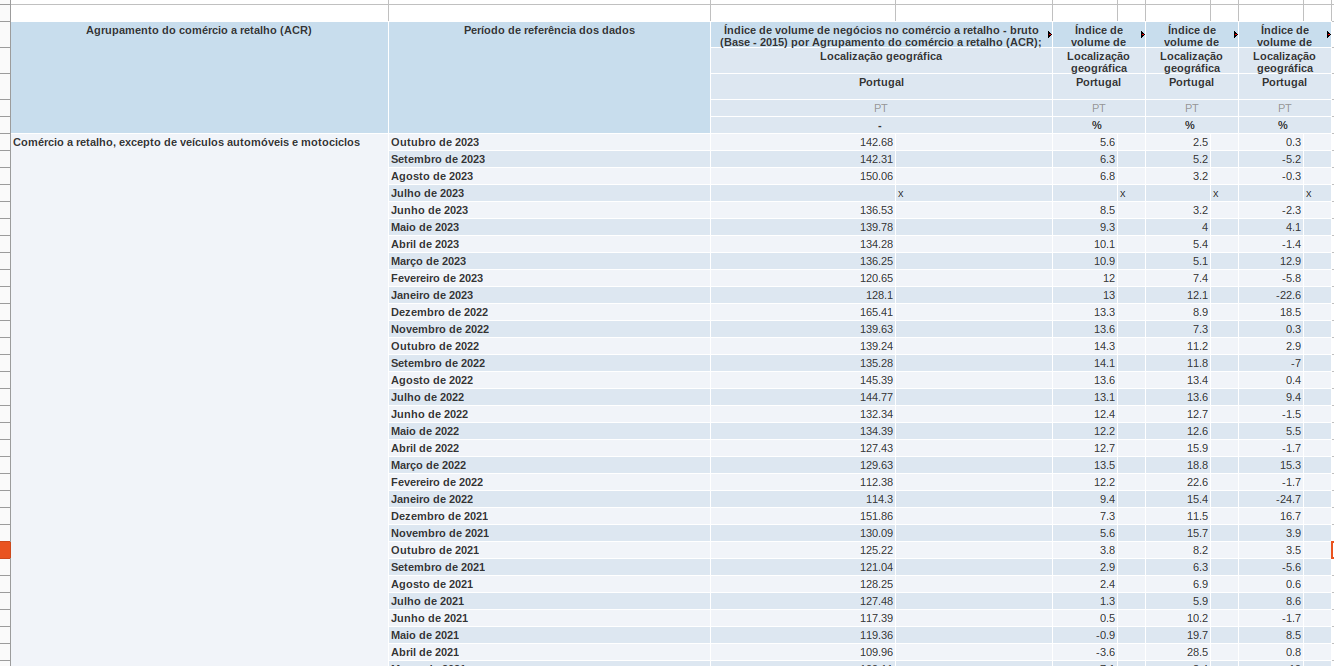

In [108]:
df_retail = pd.read_csv('retail_data.csv')
df_retail.head(5)

,retail_type,date_period,turnover_index,average_anual_variation_rate,Year_on_year_rate_of_change,monthly_rate_of_change
0,"CR: Comércio a retalho, excepto de veículos au...",Outubro de 2023,142.68,5.6,2.5,0.3
1,NaN,Setembro de 2023,142.31,6.3,5.2,-5.2
2,NaN,Agosto de 2023,150.06,6.8,3.2,-0.3
3,NaN,Julho de 2023,NaN,NaN,NaN,NaN
4,NaN,Junho de 2023,136.53,8.5,3.2,-2.3


## Fill missing data

The column retail_type is not suppose to have nulls. The original shows a merged cell.

In [109]:
df_retail['retail_type'] = df_retail['retail_type'].ffill()

These are all the rows with (other) nulls

In [110]:
df_retail[df_retail.isnull().any(axis=1)]

,retail_type,date_period,turnover_index,average_anual_variation_rate,Year_on_year_rate_of_change,monthly_rate_of_change
3,"CR: Comércio a retalho, excepto de veículos au...",Julho de 2023,NaN,NaN,NaN,NaN
61,CR1: Comércio a retalho excepto combustíveis,Julho de 2023,NaN,NaN,NaN,NaN
119,CR2: Comércio a retalho de produtos alimentare...,Julho de 2023,NaN,NaN,NaN,NaN
177,4711: Comércio a retalho em estabelecimentos n...,Julho de 2023,NaN,NaN,NaN,NaN
235,472: Comércio a retalho de produtos alimentare...,Julho de 2023,NaN,NaN,NaN,NaN
293,CR3: Comércio a retalho de produtos não alimen...,Julho de 2023,NaN,NaN,NaN,NaN
351,CR4: Comércio a retalho de produtos não alimen...,Julho de 2023,NaN,NaN,NaN,NaN
409,4719: Comércio a retalho em estabelecimentos n...,Julho de 2023,NaN,NaN,NaN,NaN
467,4730: Comércio a retalho de combustível para v...,Julho de 2023,NaN,NaN,NaN,NaN
525,CR5: Comércio a retalho de bens para o lar e s...,Julho de 2023,NaN,NaN,NaN,NaN


Looks like data is missing for July of 2023. It is really missing in original dataset.

## Split string columns

Column retail_type seems to be \<code\>: \<description\>.

In [111]:
df_retail['retail_type'].unique()

array(['CR: Comércio a retalho, excepto de veículos automóveis e motociclos',
       'CR1: Comércio a retalho excepto combustíveis',
       'CR2: Comércio a retalho de produtos alimentares, bebidas e tabaco',
       '4711: Comércio a retalho em estabelecimentos não especializados, com predominância de produtos alimentares, bebidas ou tabaco',
       '472: Comércio a retalho de produtos alimentares, bebidas e tabaco, em estabelecimentos especializados',
       'CR3: Comércio a retalho de produtos não alimentares',
       'CR4: Comércio a retalho de produtos não alimentares excepto combustível',
       '4719: Comércio a retalho em estabelecimentos não especializados, sem predominância de produtos alimentares, bebidas ou tabaco',
       '4730: Comércio a retalho de combustível para veículos a motor, em estabelecimentos especializados',
       'CR5: Comércio a retalho de bens para o lar e similares',
       'CR6: Comércio a retalho de têxteis, vestuário, calçado e artigos de couro',
      

It is. Let's split it.

In [112]:
df_retail[['retail_type_code', 'retail_type_description']] = df_retail['retail_type'].str.split(': ', expand=True)
df_retail = df_retail.drop('retail_type', axis=1)

In [113]:
df_retail

,date_period,turnover_index,average_anual_variation_rate,Year_on_year_rate_of_change,monthly_rate_of_change,retail_type_code,retail_type_description
0,Outubro de 2023,142.68,5.6,2.5,0.3,CR,"Comércio a retalho, excepto de veículos automó..."
1,Setembro de 2023,142.31,6.3,5.2,-5.2,CR,"Comércio a retalho, excepto de veículos automó..."
2,Agosto de 2023,150.06,6.8,3.2,-0.3,CR,"Comércio a retalho, excepto de veículos automó..."
3,Julho de 2023,NaN,NaN,NaN,NaN,CR,"Comércio a retalho, excepto de veículos automó..."
4,Junho de 2023,136.53,8.5,3.2,-2.3,CR,"Comércio a retalho, excepto de veículos automó..."
...,...,...,...,...,...,...,...
807,Maio de 2019,168.57,25.8,52.8,68.4,479,Comércio a retalho não efetuado em estabelecim...
808,Abril de 2019,100.09,21.6,10.2,1.6,479,Comércio a retalho não efetuado em estabelecim...
809,Março de 2019,98.47,20.9,4.8,-18.3,479,Comércio a retalho não efetuado em estabelecim...
810,Fevereiro de 2019,120.58,20.5,30.1,-0.3,479,Comércio a retalho não efetuado em estabelecim...


## Convert text to numerical date

In [114]:
locale.setlocale(locale.LC_ALL, 'pt_PT.utf8')
def convert_date_from_portuguese(text):
    converted_date = datetime.datetime.strptime(text.lower(), '%B de %Y')#.strftime('01/%m/%Y')
    return converted_date

df_retail['start_date'] = df_retail['date_period'].apply(translate_date_from_portuguese)

df_retail['start_date'] = pd.to_datetime(df_retail['start_date'], format='%d/%m/%Y')
df_retail['end_date'] = df_retail['start_date'] + pd.offsets.MonthEnd(1)


df_retail.tail(5)

,date_period,turnover_index,average_anual_variation_rate,Year_on_year_rate_of_change,monthly_rate_of_change,retail_type_code,retail_type_description,start_date,end_date
807,Maio de 2019,168.57,25.8,52.8,68.4,479,Comércio a retalho não efetuado em estabelecim...,2019-05-01,2019-05-31
808,Abril de 2019,100.09,21.6,10.2,1.6,479,Comércio a retalho não efetuado em estabelecim...,2019-04-01,2019-04-30
809,Março de 2019,98.47,20.9,4.8,-18.3,479,Comércio a retalho não efetuado em estabelecim...,2019-03-01,2019-03-31
810,Fevereiro de 2019,120.58,20.5,30.1,-0.3,479,Comércio a retalho não efetuado em estabelecim...,2019-02-01,2019-02-28
811,Janeiro de 2019,120.97,19.9,32.8,-19.6,479,Comércio a retalho não efetuado em estabelecim...,2019-01-01,2019-01-31


## Translate Portuguese to English

In [115]:
unique_descriptions = df_retail['retail_type_description'].unique()
def translate_pt_to_en(text):
    translated_text = ts.translate_text(text, translator='google', from_language='pt', to_language='en')
    return translated_text

translation = {key: translate_pt_to_en(key) for key in unique_descriptions}
df_retail['retail_type_description_en'] = df_retail['retail_type_description'].map(translation)
df_retail.head(5)

,date_period,turnover_index,average_anual_variation_rate,Year_on_year_rate_of_change,monthly_rate_of_change,retail_type_code,retail_type_description,start_date,end_date,retail_type_description_en
0,Outubro de 2023,142.68,5.6,2.5,0.3,CR,"Comércio a retalho, excepto de veículos automó...",2023-10-01,2023-10-31,"Retail trade, except car vehicles and motorcycles"
1,Setembro de 2023,142.31,6.3,5.2,-5.2,CR,"Comércio a retalho, excepto de veículos automó...",2023-09-01,2023-09-30,"Retail trade, except car vehicles and motorcycles"
2,Agosto de 2023,150.06,6.8,3.2,-0.3,CR,"Comércio a retalho, excepto de veículos automó...",2023-08-01,2023-08-31,"Retail trade, except car vehicles and motorcycles"
3,Julho de 2023,NaN,NaN,NaN,NaN,CR,"Comércio a retalho, excepto de veículos automó...",2023-07-01,2023-07-31,"Retail trade, except car vehicles and motorcycles"
4,Junho de 2023,136.53,8.5,3.2,-2.3,CR,"Comércio a retalho, excepto de veículos automó...",2023-06-01,2023-06-30,"Retail trade, except car vehicles and motorcycles"


## Drop, rename, and sort columns

In [116]:
df_retail = df_retail.drop(['date_period'], axis=1)
df_retail = df_retail.rename(columns={'period_date': 'date_period', 
                                      'Year_on_year_rate_of_change': 'year_on_year_rate_of_change',
                                      'retail_type_description': 'retail_type_description_original'})

new_order = ['start_date', 'end_date', 
             'retail_type_code', 'retail_type_description_original', 'retail_type_description_en',
             'turnover_index', 'average_anual_variation_rate', 'year_on_year_rate_of_change', 
             'monthly_rate_of_change'
            ]

df_retail = df_retail[new_order]
df_retail.head(5)

## Save dataset

In [118]:
df_retail.to_csv('retail_turnover.csv')